## random walkers, Jens Sundberg, Andris Petrebko, 2019-10-16

#### Specify the variables in the section "Specifying the variables", run the file and enjoy!

### Importing the libraries

In [48]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import random
#animation imports
from matplotlib import animation
import matplotlib.patches as mpatches
from matplotlib import cm as cm

### Specifying the variables

In [49]:
#specify 2D lattice size (quadratic lattice, [size, size])
size = 7

#specify how many steps an infected walker can take before it dies
death_steps = 10001

#specify how many steps per walker to simulate
LenTime = 10000

#define number of infected walkers array
infected_time = []


###Specify the range of the vaccinated 
NVacFirst = 15
NVacLast = 21
VacStep = 5

VacRange = np.arange(NVacFirst,NVacLast,VacStep)
#VacRange = [82,86,94,96]
NofSim = 1

###Specify number of walkers
#NWalkers = 200
NSusc = 1
NInf = 1
NVac = VacRange[-1]    #Thease additioal definitions are needed for the animation which will be created from the last interation of the loop
NWalkers = NVac + NSusc + NInf


###Specify number of first frames in the animation and if to make the animation
NFrames = LenTime #For animation
IfAnim = 1

### Begin the main part

### Define the Walker class.
Walker can be infected or vaccinated. If it is neither then the walker is susceptible. The walker contains a function randomly that generates the next position of the walker and checkes if this position is within the lattice. If it is outside then don't move the walker.

In [50]:
class Walker():
    """The walker class. Instanciated to create Walker object."""

    def __init__(self, vaccinated, infected, position):
        self.vaccinated = vaccinated
        self.infected = infected
        self.position = position

    def move(self, size):
        """Walker move method."""
        step = random.randint(1,4)
        x_step, y_step = 0, 0
        if step == 1:
            x_step = -1
        elif step == 2:
            x_step = 1
        elif step == 3:
            y_step = -1
        elif step == 4:
            y_step = 1
        #bounce if border
        if ((self.position[0] + x_step) in range(1,size+1)) and ((self.position[1] + y_step) in range(1,size+1)):
            self.position[0] += x_step
            self.position[1] += y_step
        return self.position

### The function that will generate the walkers

In [51]:
def generate_walkers(size=size, num_walkers=100, num_vaccinated=0, num_infected=1):
    """This method generates the walker objects and populates the lattice."""

    walkers = []
    for i in range(0,num_walkers):
        walkers.append(Walker(vaccinated=False, infected=0, position=[0,0]))
    
    probability_num = num_walkers
    probability_denum = size**2
    k = 0
    
    for i in range(1,size+1):
        for j in range(1,size+1):
            my_random_num = random.uniform(0,1)
            if my_random_num < probability_num/probability_denum:
                probability_num -= 1
                probability_denum -= 1
                walkers[k].position = [i,j]
                k += 1
            else:
                probability_denum -= 1

    walkers_copy = []
                
    for i in range(0,num_vaccinated):
        walker = random.choice(walkers)
        walker.vaccinated = True
        walkers_copy.append(walker)
        walkers.remove(walker)
        
    for i in range(0,num_infected):
        walker = random.choice(walkers)
        walker.infected = 1
        walkers_copy.append(walker)
        walkers.remove(walker)       
        
    for walker in walkers:
        walkers_copy.append(walker)
                
    return walkers_copy

### Define several functions

In [52]:
def check_positions(positions):
    """Checks if walkers are on the same lattice point. False/True return."""
    for elem in positions:
        num = positions.count(elem)
        if num > 1:
            check = False
            break
        elif num == 1:
            check = True
    return check


def check_num_infected(walkers):
    """Check and return number of infected walkers."""
    infected = 0
    for walker in walkers:
        if walker.infected:
            infected += 1
    return infected


def get_positions(walkers):
    """Check and return array of walker positions."""
    positions = []
    for walker in walkers:
        positions.append(walker.position)
    return positions

### Get the list of types of the walkers where 2 means infected, 
### 1 means vaccinated, 0 means susceptable
def get_types(walkers):
    type = [0]*(NWalkers)
    for i,walker in enumerate(walkers):
        if walker.infected > 0:
            type[i] = 2
        if walker.vaccinated:
            type[i] = 1
    return type

#### Define TInfHalf - a list of the values of the half infection times 
#### Define list of the values needed for the animation. Animation will be performed using the last simulated random walk

In [53]:
TInfHalf = [0]*len(VacRange)*NofSim

### Lists of all of the walker types and positions in time
walker_types = np.zeros([NWalkers,LenTime+1])
Pos_x = np.zeros([NWalkers,LenTime+1])
Pos_y = np.zeros([NWalkers,LenTime+1])

### Function ferforming one random walk
* Generate walker
* Cross check that no start positions are at the same lattice point (can be obsoleted)
* Do the random walk

In [54]:
def lets_walk(num_walkers=100, num_vaccinated=0, num_infected=1):

    while True:
        walkers = generate_walkers(num_walkers=num_walkers, num_vaccinated=num_vaccinated, num_infected=num_infected)
        positions = get_positions(walkers)
        start_check = check_positions(positions)
        if start_check:
            print('Walkers generated...')
            break
    #set initial parameters before walk
    infected_time = []
    infected = check_num_infected(walkers)
    infected_time.append(infected)
    t = 0
    time_array = [t]

    if VacRange[-1] == num_vaccinated: #To save only for the last iteration
        positions=np.array(get_positions(walkers))
        Pos_x[:,0] = positions[:,0]   
        Pos_y[:,0] = positions[:,1]
        
    walker_types[:num_walkers,0] = get_types(walkers)
   
    
    #start moving the walkers, one at a time

    for i in range(0,LenTime):
        if len(Time2Infect) > (NSusc//2):
            break
        for nr,walker in enumerate(walkers):
            old_position = walker.position.copy()
            new_position = walker.move(size)
            positions = get_positions(walkers)
            check = check_positions(positions)
            #bounce walker and do disease logic if it encounters another walker
            if not check:
                walker.position = old_position
                positions = get_positions(walkers)
                #disease spreading logic
                if not walker.vaccinated:
                    other_walker = walkers[positions.index(new_position)]
                    if other_walker.infected and not walker.infected:
                        walker.infected = 1
                        Time2Infect.append(i) #Save the time whenn it got infected
                    if not other_walker.vaccinated:
                        if walker.infected and not other_walker.infected:
                            other_walker.infected = 1
                            Time2Infect.append(i)
            ########Infected guy dies
            if walker.infected > 0:
                walker.infected += 1
                if walker.infected >= death_steps:
                    #print('died')
                    del walkers[nr]

            #increment time
            t += 1/NWalkers
            time_array.append(t)
            infected = check_num_infected(walkers) 
            infected_time.append(infected)

            #######Store all of the positions and types of walkers after each step##########
            if VacRange[-1] != num_vaccinated:
                continue

            if len(walkers) != 0:
                NDelWalkers = NWalkers-len(walkers)
                positions=np.array(get_positions(walkers))
               #print(Pos_x[:,i])
                Pos_x[:,(i+1)] = np.pad(positions[:,0], (0,NDelWalkers ), 'constant')   
                Pos_y[:,(i+1)] = np.pad(positions[:,1], (0,NDelWalkers ), 'constant')
                walker_types[:,(i+1)] = get_types(walkers)
                

#     plt.plot(time_array, infected_time, label=str(num_vaccinated))
    ###The time is cut, so it is needed to cut the walker_types array
    plt.plot(time_array[::(num_walkers)],sum(walker_types[:,:len(time_array[::(num_walkers)])] == 2), label=str(num_vaccinated))
#time_array[::(NWalkers-1)],

    
    #positions=np.array(get_positions(walkers))  
    #Pos_x[:,i] = positions[:,0]
    #Pos_y[:,i] = positions[:,1]
    #walker_types[:,i] = get_types(walkers)

#Main generation loop, generate several walks

### Perform the random walk and plot the evolution of the function

Walkers generated...


<IPython.core.display.Javascript object>


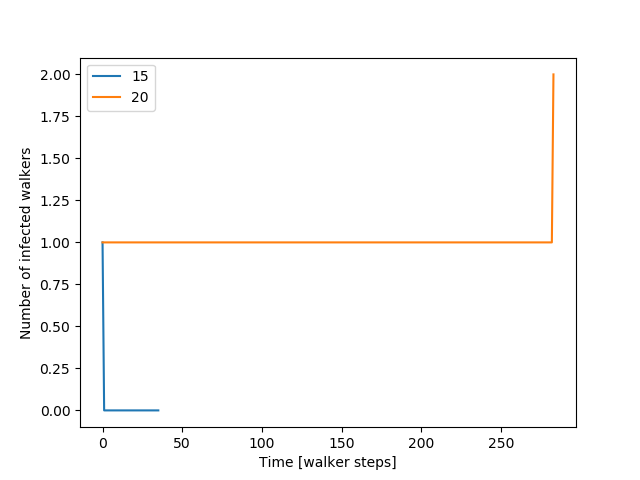

34
Walkers generated...
282


C:\Users\Andris\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [55]:
for i, N_vacc in enumerate(VacRange):
    NSusc = NWalkers - N_vacc - NInf
#    NWalkers = NSusc + N_vacc + NInf
    for j in range(NofSim):
        #A list where to save time to get infected
        Time2Infect = []
        lets_walk(num_walkers=NWalkers, num_vaccinated=N_vacc, num_infected=NInf)
        ######Save the time needed to infect half of the people:
        if len(Time2Infect) > (NSusc//2):
            TInfHalf[(i)*NofSim+j] = Time2Infect[NSusc//2]
            print(Time2Infect[NSusc//2])
#            break
        else:
            print("Infected only ",len(Time2Infect)," people for Nr of vacc = ",N_vacc)
#            break
#        if len(Time2Infect) > (NSusc//2):
#            break

ax = plt.subplot(111)
ax.legend(loc='upper left')
#plt.title('Infected population vs time')
plt.ylabel('Number of infected walkers')
plt.xlabel('Time [walker steps]')
plt.show()

### Print the obtained averaged half infection times and its standard deviation

In [56]:
print(np.mean(np.array(TInfHalf).reshape(len(VacRange), NofSim),axis=1))
print(np.std(np.array(TInfHalf).reshape(len(VacRange), NofSim),axis=1))

[ 34. 282.]
[0. 0.]


## Animation
#### Matrix of all of the colors of walkers.

In [57]:
###### Animation does not understand such things as 'r' or  'red'.
######So I am instead using a colormat called 'Paired'.
Markers = np.zeros([NWalkers,(LenTime+1)])
Markers[walker_types==0] = 0.8  # Susceptible people - violet 
Markers[walker_types==1] = 0.6  # Vaccinated - orange
Markers[walker_types==2] = 0.45 # Infected - red

### Define the animation

<IPython.core.display.Javascript object>


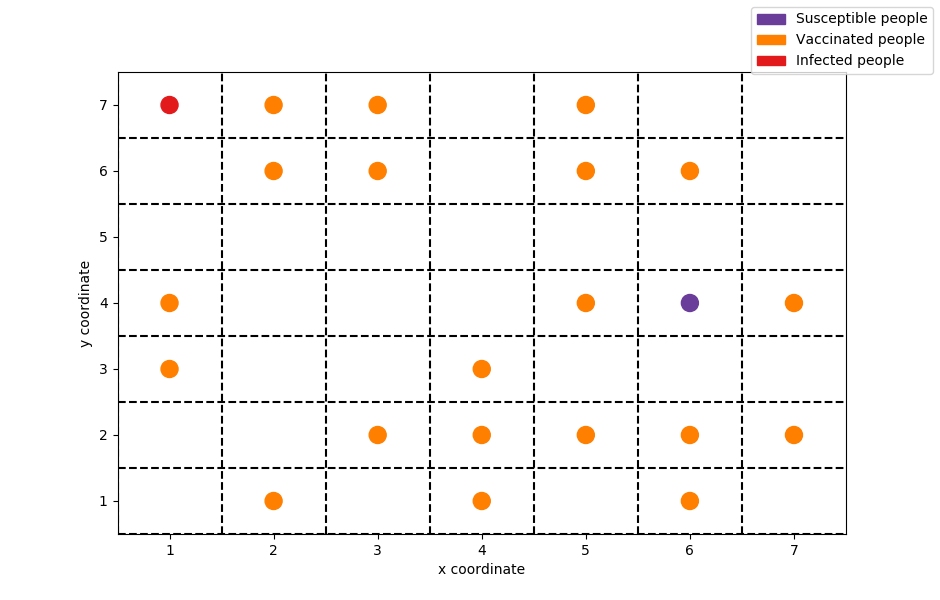

In [58]:
fig, ax2 = plt.subplots()
fig.set_size_inches(9.4, 6.0)
#fig.set_size_inches(8.3, 4.8) #For putting in pdf need smaller
#fig.subplots_adjust(left=0.08, bottom=0.15,right=1,top=0.95)

ax2.set(xlabel="x coordinate", ylabel='y coordinate', xlim=([0.5,size+0.5]), ylim=([0.5,size+0.5]) ) #,title='Title')

scat = ax2.scatter(Pos_x[:,0], Pos_y[:,0], c=Markers[:,0], marker = 'o'
                  ,s=150,cmap='Paired',vmin=0,vmax=1)# c=np.linspace(0,2,20),# cmap='Paired')

if size<10:
    for i in np.arange(0.5,size+ 0.5,1):
        ax2.axhline(y = i , linestyle='--', color='k')
        ax2.axvline(x = i, linestyle='--', color='k')

cmap=cm.get_cmap('Paired')
Susc_patch = mpatches.Patch(color=cmap(0.8), label='Susceptible people')
Vacc_patch = mpatches.Patch(color=cmap(0.6), label='Vaccinated people')
Inf_patch = mpatches.Patch(color=cmap(0.45), label='Infected people')
fig.legend(handles=[Susc_patch,Vacc_patch, Inf_patch])

def update_plot(t, Pos_x_new,Pos_y_new,Mark_new, scat):
    scat.set_offsets(np.transpose([Pos_x[:,t], Pos_y[:,t]]))  #New positions
    scat.set_array(Markers[:,t])
    return (scat)

NFrames = Time2Infect[-1] + 2


ani = animation.FuncAnimation(fig, update_plot, frames=NFrames, interval=500,
                             fargs=(Pos_x, Pos_y,Markers,scat)) 

Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, metadata=dict(artist='Me'), bitrate=1000)
Name='Anim_NWalk_'+str(NWalkers)+'_NVac_'+str(NVac)+'.mp4'

In [59]:
%%time
if IfAnim:
    ani.save(Name, writer=writer)

Wall time: 43.2 s


### First passage if needed

In [60]:
####The calculation of the First passage in the case of 1 infected
####and 1 susceptible
#import pandas as pd
#OutFrame = pd.DataFrame(TInfHalf)


#with open('FirstPass.csv','w') as tf:
#   tf.write(OutFrame.to_csv())
#
#fig, ax2 = plt.subplots()
#ax2.hist(TInfHalf,bins=50)
#xval = np.linspace(0.1,300,100)
#yval = 5/np.sqrt(4*np.pi*t^3)*np.exp(-5^2/(4*xal))
#ax2.plot(xval,yval)
#plt.show()